# What is the Most Traversable Neighborhood in Pittsburgh?

## Data Sets

### Crash Data - Chris
https://data.wprdc.org/dataset/allegheny-county-crash-data/resource/2c13021f-74a9-4289-a1e5-fe0472c89881

### Traffic Count - Alex
https://data.wprdc.org/dataset/traffic-count-data-city-of-pittsburgh/resource/6dfd4f8f-cbf5-4917-a5eb-fd07f4403167

### Transportation Type Data - Logan
https://data.wprdc.org/dataset/pgh/resource/5d61b60b-bd25-4c33-8420-e31a9135ec6e


To find the best neighborhood in Pittsburgh we decided to find one that was easy to traverse. In order to do this we used three metrics: City of Pittsburgh traffic count,   ,and. We then each did our own analysis of each metric and then overlapped our findings to find the best neighborhood.

# City of Pittsburgh Crash Data 

To help answer the question of what is the most traversable neighborhood in Pittsburgh, we can look at the crash data in each neighborhood. Safety is a large factor in determining traversability. The amount of people involved in accidents in certain areas can show which neighborhoods are safe to travel and which are not as safe. Then, you can look into what causes this. I do this by checking which incidents related to the road condition and which related to negligence by the driver.

Firstly, I'll read in the crash data set and the municipality codes.

In [4]:
import pandas as pd
from matplotlib import pyplot as plt

crash_data = pd.read_csv("https://tools.wprdc.org/downstream/2c13021f-74a9-4289-a1e5-fe0472c89881", dtype=str)
municipality_codes = pd.read_csv("https://data.wprdc.org/dataset/3130f583-9499-472b-bb5a-f63a6ff6059a/resource/fb81a55f-c560-4541-9ad4-7ea7c41f79e7/download/municipalitycodes.csv", index_col="Code")

crash_data.head()

,_id,CRASH_CRN,DISTRICT,CRASH_COUNTY,MUNICIPALITY,POLICE_AGCY,CRASH_YEAR,CRASH_MONTH,DAY_OF_WEEK,TIME_OF_DAY,...,LANE_COUNT,RDWY_ORIENT,ROAD_OWNER,ROUTE,SPEED_LIMIT,SEGMENT,OFFSET,STREET_NAME,TOT_INJ_COUNT,SCHOOL_BUS_UNIT
0,1,2004000001,11,02,02454,02454,2004,01,5,0257,...,2,E,2,2032,35,0010,1000,LEWIS RUN RD,NaN,NaN
1,2,2004000010,11,02,02440,02440,2004,01,5,1027,...,2,W,3,NaN,35,NaN,NaN,COAL VALLEY RD,NaN,NaN
2,3,2004000016,11,02,02203,02203,2004,01,5,1839,...,2,W,2,3082,35,NaN,NaN,CLINTON FRANKFORT RD,NaN,NaN
3,4,2004000022,11,02,02404,02404,2004,01,6,0914,...,2,N,4,NaN,25,NaN,NaN,NORTH BALPH AV,NaN,NaN
4,5,2004000030,11,02,02419,02419,2004,01,5,2230,...,2,S,4,NaN,20,NaN,NaN,THORNBERRY DR,NaN,NaN


In [5]:
municipality_codes.head()

,Municipality
Code,
2101,Baldwin Township
2102,Collier Township
2103,Crescent Township
2104,East Deer Township
2105,Elizabeth Township


## Cyclist and Pedestrian Crash Totals

In [14]:
ped_crashes = dict()

# iterates through every row of crash data
for i in range(len(crash_data)):
    
    # stores important values from each row
    ped_count = crash_data.loc[i, 'PEDESTRIAN']
    cyc_count = crash_data.loc[i, 'BICYCLE_COUNT']
    neighborhood = crash_data.loc[i, 'MUNICIPALITY']
    
    # if it doesn't already exist in the data set, add it with 0
    if neighborhood not in ped_crashes:
        ped_crashes[neighborhood] = 0
    # if data points indicate one of the following, increment it in the dictionary for that neighborhood
    if int(ped_count) > 0:
        ped_crashes[neighborhood] += 1
    if int(cyc_count) > 0:
        ped_crashes[neighborhood] += 1
            
new_ped_crashes = pd.Series(ped_crashes)
sorted_ped_crashes = new_ped_crashes.sort_values()
sorted_ped_crashes.head(50)

02120    0
02457    0
02114    0
02491    0
02107    0
02417    0
02436    0
02482    0
02206    0
02465    0
02202    1
02470    1
02125    1
02452    1
02101    1
02471    1
02412    1
02450    1
02432    1
02406    1
02459    1
02455    1
02443    2
02211    2
02472    2
02103    2
02442    2
02121    2
02418    3
02490    3
02204    4
02434    4
02462    5
02215    5
02460    5
02409    5
02468    6
02405    6
02480    6
02411    6
02104    6
02479    7
02475    7
02469    7
02408    7
02410    7
02401    7
02478    7
02124    8
02428    8
dtype: int64

Text(0.5, 0, 'Municipality')

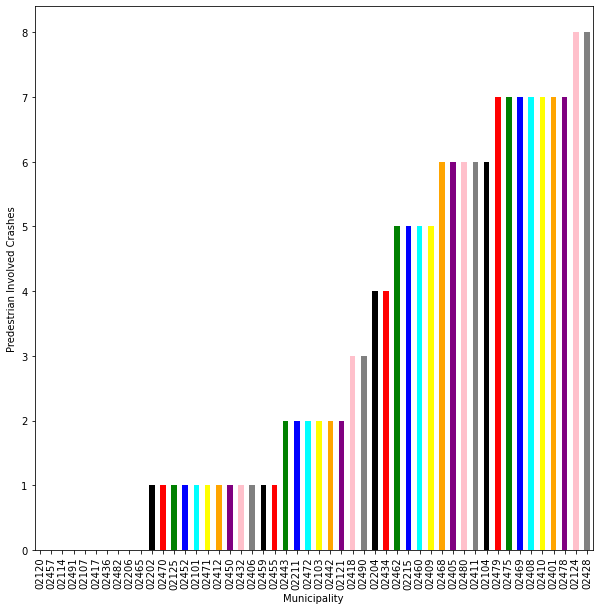

In [15]:
lowest_pedestrian_crashes = sorted_ped_crashes.head(50)

# vertical bar graph for the first 50 neighborhoods
plot1 = lowest_pedestrian_crashes.plot(kind='bar', figsize=(10,10), color=['black', 'red', 'green', 'blue', 'cyan', 'yellow', 'orange', 'purple', 'pink', 'gray'])
# y axis label
plot1.set_ylabel("Predestrian Involved Crashes")
# x axis label
plot1.set_xlabel("Municipality")

10 Neighborhoods do not have any cyclist or pedestrian accidents. Therefore, I will use the population in these neighborhoods to determine which has had the least incidents for the amount of daily traffic.
The neighborhoods with 0 incidents are: South Versailles Township, Rosslyn Farms Borough, Reserve Township, Trafford Borough, Leet Township, Chalfant Borough, Haysville Borough, Pennsbury Village, Harrison Township, and Thornburg Borough.

* South Versailles Township  - 339
* Rosslyn Farms Borough - 435
* Reserve Township - 3,234
* Trafford Borough - 3,280
* Leet Township - 1,580
* Chalfant Borough - 739
* Haysville Borough - 81 
* Pennsbury Village - 668
* Harrison Township - 10,292
* Thornburg Borough - 461

The top 3 are Harrison Township, Trafford Borough, and Reserve Township.

## Accidents as a Result of Unsafe Road Conditions

Now I will be adding up all of the accidents that result in unsafe road conditions. If a road has a higher amount of crashes that are caused by road conditions, it will be less safe for someone to travel on this road whether they are biking, walking, or driving. Therefore, this factor would make an area less traversable.

In [12]:
unsafe_roads = dict()

# iterates every row of crash_data
for i in range(len(crash_data)):
    
    # stores important data points for each row
    illumination = crash_data.loc[i, 'ILLUMINATION']
    curve = crash_data.loc[i, 'CURVED_ROAD']
    ice = crash_data.loc[i, 'SNOW_SLUSH_ROAD']
    wet_road = crash_data.loc[i, 'WET_ROAD']
    neighborhood = crash_data.loc[i, 'MUNICIPALITY']
    
    # if the neighborhood doesn't exist in the dictionary, add it wtih 0
    if neighborhood not in unsafe_roads:
        unsafe_roads[neighborhood] = 0
    # if data points indicate one of the following, increment it in the dictionary for that neighborhood
    if int(illumination) == 2:
        unsafe_roads[neighborhood] += 1
    if int(curve) > 0:
        unsafe_roads[neighborhood] += 1
    if int(ice) > 0:
        unsafe_roads[neighborhood] += 1    
    if int(wet_road) > 0:
        unsafe_roads[neighborhood] += 1
        
# creates a new series from the dictionary
new_unsafe_roads = pd.Series(unsafe_roads)
sorted_unsafe_roads = new_unsafe_roads.sort_values()
sorted_unsafe_roads.head(10)

02491     1
02120     6
02482     6
02406     6
02410    12
02490    12
02417    14
02452    18
02465    18
02442    19
dtype: int64

Text(0.5, 0, 'Municipality')

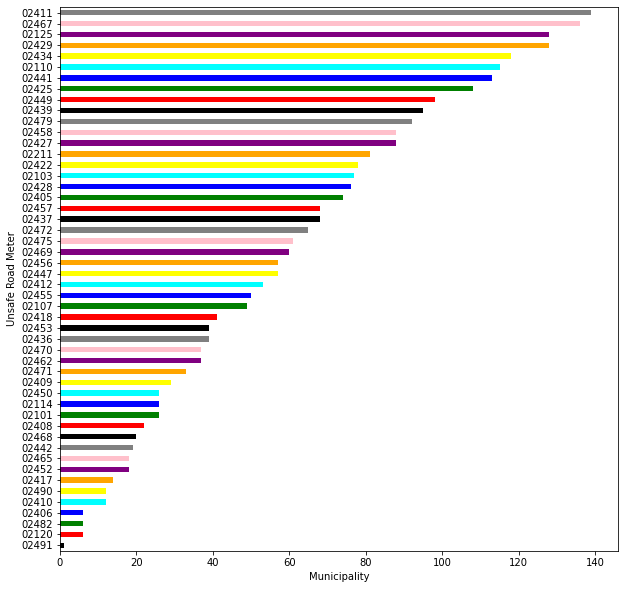

In [13]:
safest_roads = sorted_unsafe_roads.head(50)

# horizontal bar graph of the first 50 neighborhoods with unsafe road condition related incidents.
plot2 = safest_roads.plot(kind='barh', figsize=(10,10), color=['black', 'red', 'green', 'blue', 'cyan', 'yellow', 'orange', 'purple', 'pink', 'gray'])
# y axis label
plot2.set_ylabel("Unsafe Road Meter")
# x axis label
plot2.set_xlabel("Municipality")

The top 3 neighborhoods with the least accidents resulting from road conditions are Trafford Borough, South Versailles Township, and Pennsbury Village. Harrison Township was also tied for third. 

## Neighborhood With the Most Hazardous Drivers

Looking at crashes that resulted from hazardous drivers can give insight to the safety traveling in that area. The data that can show this could be drunk driving, speeding, or cell phone use.

In [10]:
hazardous_drivers = dict()

# loops through every row of the crash data
for i in range(len(crash_data)):
    
    # stores values of data points for each row 
    alcohol = crash_data.loc[i, 'ALCOHOL_RELATED']
    phone = crash_data.loc[i, 'CELL_PHONE']
    red_light = crash_data.loc[i, 'RUNNING_RED_LT']
    tailgaiting = crash_data.loc[i, 'TAILGATING']
    speeding = crash_data.loc[i, 'SPEEDING_RELATED']
    agressive_driving = crash_data.loc[i, 'AGGRESSIVE_DRIVING']
    neighborhood = crash_data.loc[i, 'MUNICIPALITY']
    
    # if the neighborhood does not already exist in the dictionary, add it with 0
    if neighborhood not in hazardous_drivers:
        hazardous_drivers[neighborhood] = 0
    # if data points indicate one of the following, increment it in the dictionary for that neighborhood
    if int(alcohol) == 2:
        hazardous_drivers[neighborhood] += 1
    if int(phone) > 0:
        hazardous_drivers[neighborhood] += 1
    if int(red_light) > 0:
        hazardous_drivers[neighborhood] += 1  
    if int(tailgaiting) > 0:
        hazardous_drivers[neighborhood] += 1  
    if int(speeding) > 0:
        hazardous_drivers[neighborhood] += 1  
    if int(agressive_driving) > 0:
        hazardous_drivers[neighborhood] += 1
        
# make a new temp series from the dictionary to sort the values
new_hazardous_drivers = pd.Series(hazardous_drivers)
sorted_hazardous_drivers = new_hazardous_drivers.sort_values()
sorted_hazardous_drivers.head(10)

02120     2
02482     2
02406     3
02491     4
02490    19
02114    23
02107    23
02470    23
02442    24
02417    29
dtype: int64

Text(0.5, 0, 'Municipality')

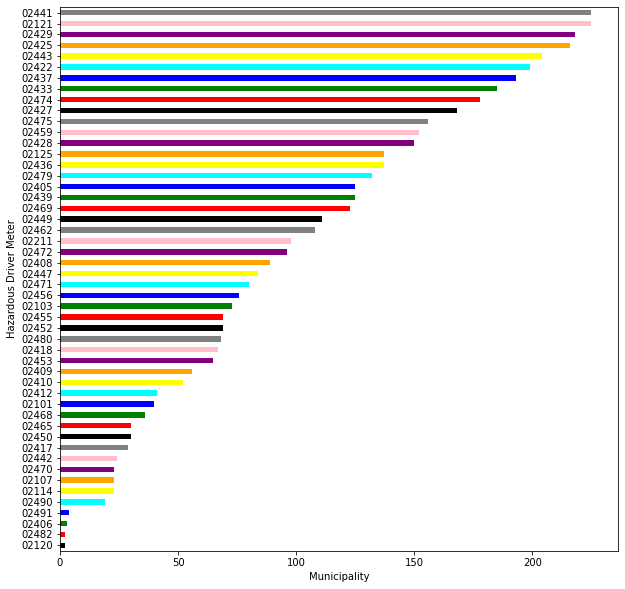

In [11]:
least_hazardous_drivers = sorted_hazardous_drivers.head(50)

# plot the first 50 neighborhoods from most hazardous driver incidents to least
plot3 = least_hazardous_drivers.plot(kind='barh', figsize=(10,10), color=['black', 'red', 'green', 'blue', 'cyan', 'yellow', 'orange', 'purple', 'pink', 'gray'])
# y axis label
plot3.set_ylabel("Hazardous Driver Meter")
# x axis label
plot3.set_xlabel("Municipality")

The top 3 neighborhoods with the least hazardous drivers are South Versailles Township, Pennsbury Village, and Harrison Township.

# Conclusion

**Cyclist and Pedestrian Crash Totals**

* 1. Harrison Township - 3
* 2. Trafford Borough - 2
* 3. Reserve Township - 1

**Accidents as a Result of Unsafe Road Conditions**

* 1. Trafford Borough - 3
* 2. South Versailles Township - 2
* 3. Pennsbury Village - 1
* 3. Harrison Township - 1

**Neighborhood With the Most Hazardous Drivers**

* 1. South Versailles Township - 3
* 2. Pennsbury Village - 2
* 3. Harrison Township - 1

To determine which is the most traversable neighborhood based on this data, I will use a point system. I will give 3 points for 1st place, 2 for 2nd, and 1 for 3rd. In addition, I will give an additional point for the first metric because out of the 3 it is the most important and should be rated the most heavily.

* Harrison Township - 6
* South Versailles Township - 5
* Trafford Borough - 5
* Pennsbury Village - 3
* Reserve Township - 1

Based on this data set, the most traversable neighborhood in Pittsburgh is Harrison Township.

# City of Pittsburgh Traffic Count

In order to answer our research question we must analyze the automobile traffic and its impact on traversability of our target neighborhoods. I will do this by finding the average daily traffic, percent of vehicles over the speed limit, and the maximum recorded speed for each neighborhood.




In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
%matplotlib inline
import matplotlib.pyplot as plt
#change display options to show all rows and columns
pd.options.display.max_columns=999
pd.options.display.max_rows=999

After the data is read in, we must remove rows that are missing a value for the fields of interest.

In [2]:
#open the City of Pittsburgh Traffic data file
traffic = pd.read_csv("City of Pittsburgh Traffic Count Data.csv")
#drop rows with na for fields of interest
traffic = traffic.dropna(subset=['average_daily_car_traffic'])
traffic = traffic.dropna(subset=['neighborhood'])
#reset index after dropping rows
traffic.reset_index(drop=True, inplace=True)
traffic.head(10)

,id,device_id,record_oid,count_start_date,count_end_date,average_daily_car_traffic,average_daily_bike_traffic,counter_number,counter_type,speed_limit,max_speed,median_speed,percent_over_limit,speed85_percent,speed95_percent,longitude,latitude,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone
0,1011743669,85,1.445865e+09,2019-04-18,2019-04-26,4949.0,NaN,6,StatTrak,25.0,NaN,29.0,77.0,34.0,37.0,-79.967772,40.455733,Polish Hill,7.0,6.0,42003060500,6.0,6.0,2.0,2-6
1,103627606,9,7.341951e+08,2018-07-17,2018-08-01,2741.0,NaN,NaN,StatTrak,25.0,61.0,28.0,70.0,31.0,33.0,-79.914335,40.437379,Squirrel Hill South,5.0,14.0,42003140800,3.0,14.0,4.0,2-18
2,1041392556,76,5.713472e+08,2019-03-22,2019-03-29,1046.0,NaN,2,StatTrak,25.0,NaN,19.0,2.0,21.0,23.0,-80.014234,40.458106,Central Northside,6.0,25.0,42003250300,1.0,25.0,1.0,1-21
3,1053645660,87,8.042089e+08,2019-04-18,2019-04-26,3015.0,NaN,4,StatTrak,25.0,NaN,26.0,58.0,31.0,34.0,-79.964592,40.457119,Polish Hill,7.0,6.0,42003060500,6.0,6.0,2.0,2-6
4,1102260248,8,1.088318e+09,2018-07-16,2018-08-01,5592.0,NaN,NaN,StatTrak,25.0,61.0,28.0,70.0,31.0,33.0,-79.911925,40.435620,Squirrel Hill South,5.0,14.0,42003140800,3.0,14.0,4.0,2-21
5,1130122192,65,1.341476e+09,2019-02-05,2019-02-14,1455.0,NaN,NaN,StatTrak,25.0,NaN,22.0,23.0,28.0,32.0,-79.979554,40.436482,Bluff,6.0,1.0,42003010300,3.0,1.0,2.0,2-1
6,115502120,176,1.215643e+09,2019-08-09,2019-08-19,11500.0,NaN,5,StatTrak,25.0,NaN,37.0,98.0,41.0,44.0,-80.052403,40.451926,Crafton Heights,2.0,20.0,42003281400,5.0,20.0,6.0,1-16
7,1155507145,72,1.207664e+09,2019-02-14,2019-02-21,6793.0,NaN,1,StatTrak,25.0,NaN,26.0,NaN,30.0,NaN,-79.943745,40.452709,Shadyside,8.0,7.0,42003070900,2.0,7.0,4.0,3-22
8,1158858353,36,1.131387e+09,2018-06-25,2018-07-12,7688.0,NaN,NaN,StatTrak,25.0,64.0,32.0,92.0,35.0,38.0,-79.923316,40.478161,Highland Park,7.0,11.0,42003110200,2.0,11.0,5.0,3-9
9,1159852619,118,1.024536e+09,2019-07-09,2019-07-12,10350.0,NaN,12,StatTrak,25.0,NaN,29.0,78.0,34.0,39.0,-80.001937,40.447849,North Shore,1.0,22.0,42003563200,6.0,22.0,1.0,1-20


# Average Daily Traffic

In [3]:
# sort the rows by neighborhoods
traffic_sorted = traffic.sort_values('neighborhood')
traffic_sorted.head(10)

,id,device_id,record_oid,count_start_date,count_end_date,average_daily_car_traffic,average_daily_bike_traffic,counter_number,counter_type,speed_limit,max_speed,median_speed,percent_over_limit,speed85_percent,speed95_percent,longitude,latitude,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone
87,462461649,78,3.743645e+08,2019-03-22,2019-03-29,2386.0,NaN,4,StatTrak,25.0,NaN,27.0,65.0,32.0,36.0,-80.009269,40.451106,Allegheny Center,1.0,22.0,42003562700,1.0,22.0,1.0,1-7
129,2137013195,221,2.090544e+09,2019-12-30,2020-01-14,477.0,NaN,2,StatTrak,25.0,NaN,20.0,11.0,24.0,28.0,-80.016819,40.452706,Allegheny West,1.0,22.0,42003562700,1.0,22.0,1.0,1-7
142,1471518402,237,4.277385e+08,2020-02-05,2020-02-13,2224.0,NaN,3,StatTrak,25.0,NaN,28.0,73.0,32.0,35.0,-79.977394,40.417815,Arlington,3.0,16.0,42003160800,3.0,16.0,3.0,4-22
143,1425434092,238,8.214502e+08,2020-02-05,2020-02-13,2347.0,NaN,1,StatTrak,25.0,NaN,25.0,50.0,30.0,34.0,-79.974196,40.417286,Arlington,3.0,16.0,42003561600,3.0,16.0,3.0,4-22
48,181106020,184,2.107179e+09,2019-09-09,2019-09-17,763.0,NaN,14,StatTrak,25.0,NaN,22.0,20.0,27.0,30.0,-80.026457,40.409511,Beechview,4.0,19.0,42003191600,5.0,19.0,6.0,4-28
140,1908186545,234,8.955754e+08,2020-02-05,2020-02-13,1446.0,NaN,Check Radar,StatTrak,25.0,NaN,28.0,72.0,32.0,35.0,-80.025019,40.418921,Beechview,4.0,19.0,42003191600,5.0,19.0,6.0,4-28
38,1670424503,45,2.562964e+08,2018-12-11,2018-12-20,2046.0,NaN,2,StatTrak,25.0,56.0,30.0,85.0,35.0,38.0,-80.025537,40.404949,Beechview,4.0,19.0,42003192000,5.0,19.0,6.0,4-28
169,756230800,275,1.042493e+09,2020-07-15,2020-07-23,1577.0,NaN,NaN,StatTrak,NaN,NaN,23.0,NaN,29.0,33.0,-80.002440,40.421750,Beltzhoover,3.0,18.0,42003562400,5.0,18.0,3.0,4-5
156,799096979,262,1.169829e+09,2020-09-04,2020-09-11,79.0,NaN,#5,StatTrak,25.0,NaN,15.0,NaN,18.0,21.0,-79.946953,40.465129,Bloomfield,7.0,8.0,42003080900,2.0,8.0,5.0,3-6
32,1592268905,111,2.423742e+08,2019-06-28,2019-07-05,6984.0,NaN,11,StatTrak,35.0,NaN,30.0,14.0,35.0,39.0,-79.950080,40.454024,Bloomfield,7.0,8.0,42003080400,2.0,8.0,5.0,2-23


In [4]:
#create the dictionary
traffic_dict = dict()
traffic_count = dict()
# iterate through the dataframe
for i in range(len(traffic)):
    # get the neighborhood name and the average daily traffic for it
    item = traffic.loc[i, 'neighborhood']
    item2 = traffic.loc[i, 'average_daily_car_traffic']
    
    if item in traffic_dict: # if it's in the dict add to running total and increment count
        traffic_dict[item] = (traffic_dict[item] + item2)
        traffic_count[item] = (traffic_count[item] + 1)
    else:
        traffic_dict[item] = item2 # otherwise, set it to the quantity and set count
        traffic_count[item] =1
        
for item in traffic_dict: #computing the average 
    traffic_dict[item] = traffic_dict[item] / traffic_count[item]

In [5]:
#convert dictionary back to series
traffic_series = pd.Series(traffic_dict, name = "Average Daily Traffic")
traffic_series.sort_values()[:]

South Side Flats               115.000000
Lincoln Place                  126.000000
Lincoln-Lemington-Belmar       195.000000
Fineview                       419.000000
Allegheny West                 477.000000
New Homestead                  666.000000
Overbrook                      777.000000
Summer Hill                    937.000000
Upper Hill                     953.333333
Central Northside             1189.000000
Spring Garden                 1226.000000
Hazelwood                     1289.500000
Spring Hill-City View         1293.000000
Elliott                       1342.666667
Beechview                     1418.333333
Windgap                       1531.000000
Highland Park                 1564.733333
Beltzhoover                   1577.000000
Lower Lawrenceville           1736.000000
Bluff                         1788.333333
East Allegheny                1924.000000
Carrick                       1969.571429
Morningside                   2049.285714
Perry North                   2123

Text(0, 0.5, 'Average Daily Traffic')

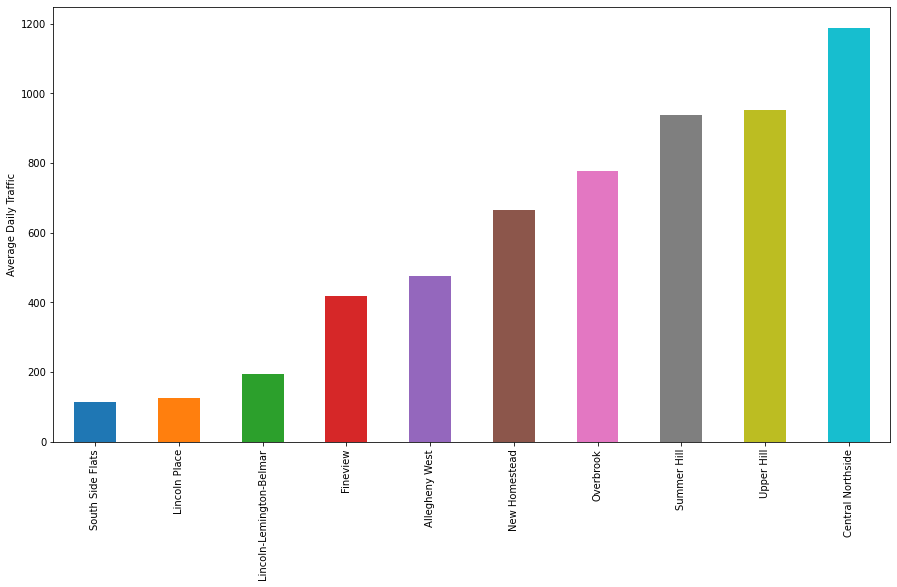

In [6]:
#graph top ten neighborhoods for lowest average daily traffic
top_ten_traffic = traffic_series.sort_values(ascending=True)[:10]
tgraph = top_ten_traffic.T.plot(kind='bar', label='index', color=['C0','C1','C2','C3','C4','C5','C6','C7','C8','C9','C10'],figsize=(15,top_ten_traffic.shape[0] * 0.8),legend=None)
tgraph.set_ylabel("Average Daily Traffic")

According to the graph the neighborhood with the lowest recorded amount of traffic is the South Side Flats(115 cars per day). Lincoln Place came in close in 2nd(126 cars per day).

# Speeders

Rereading in the data to avoid anomolies from data cleaning for the first analysis. 

In [20]:
speeder = pd.read_csv("City of Pittsburgh Traffic Count Data.csv")
#drop rows with na for fields of interest
speeder = speeder.dropna(subset=['percent_over_limit'])
speeder = speeder.dropna(subset=['neighborhood'])
#reset index after dropping rows
speeder.reset_index(drop=True, inplace=True)
speeder.head(10)

,id,device_id,record_oid,count_start_date,count_end_date,average_daily_car_traffic,average_daily_bike_traffic,counter_number,counter_type,speed_limit,max_speed,median_speed,percent_over_limit,speed85_percent,speed95_percent,longitude,latitude,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone
0,1011743669,85,1.445865e+09,2019-04-18,2019-04-26,4949.0,NaN,6,StatTrak,25.0,NaN,29.0,77.0,34.0,37.0,-79.967772,40.455733,Polish Hill,7.0,6.0,42003060500,6.0,6.0,2.0,2-6
1,1032382575,11,1.539893e+09,2018-08-28,2018-09-04,NaN,NaN,NaN,NaN,35.0,63.0,33.0,28.0,38.0,41.0,-80.076469,40.460717,Windgap,2.0,28.0,42003563000,5.0,28.0,6.0,1-16
2,103627606,9,7.341951e+08,2018-07-17,2018-08-01,2741.0,NaN,NaN,StatTrak,25.0,61.0,28.0,70.0,31.0,33.0,-79.914335,40.437379,Squirrel Hill South,5.0,14.0,42003140800,3.0,14.0,4.0,2-18
3,1041392556,76,5.713472e+08,2019-03-22,2019-03-29,1046.0,NaN,2,StatTrak,25.0,NaN,19.0,2.0,21.0,23.0,-80.014234,40.458106,Central Northside,6.0,25.0,42003250300,1.0,25.0,1.0,1-21
4,1053645660,87,8.042089e+08,2019-04-18,2019-04-26,3015.0,NaN,4,StatTrak,25.0,NaN,26.0,58.0,31.0,34.0,-79.964592,40.457119,Polish Hill,7.0,6.0,42003060500,6.0,6.0,2.0,2-6
5,1102260248,8,1.088318e+09,2018-07-16,2018-08-01,5592.0,NaN,NaN,StatTrak,25.0,61.0,28.0,70.0,31.0,33.0,-79.911925,40.435620,Squirrel Hill South,5.0,14.0,42003140800,3.0,14.0,4.0,2-21
6,1110382210,47,1.066699e+08,2019-05-31,2019-06-06,NaN,NaN,NaN,StatTrak,25.0,NaN,29.0,75.0,35.0,38.0,-79.927370,40.423722,Greenfield,5.0,15.0,42003151700,3.0,15.0,4.0,2-15
7,1130122192,65,1.341476e+09,2019-02-05,2019-02-14,1455.0,NaN,NaN,StatTrak,25.0,NaN,22.0,23.0,28.0,32.0,-79.979554,40.436482,Bluff,6.0,1.0,42003010300,3.0,1.0,2.0,2-1
8,115502120,176,1.215643e+09,2019-08-09,2019-08-19,11500.0,NaN,5,StatTrak,25.0,NaN,37.0,98.0,41.0,44.0,-80.052403,40.451926,Crafton Heights,2.0,20.0,42003281400,5.0,20.0,6.0,1-16
9,1158858353,36,1.131387e+09,2018-06-25,2018-07-12,7688.0,NaN,NaN,StatTrak,25.0,64.0,32.0,92.0,35.0,38.0,-79.923316,40.478161,Highland Park,7.0,11.0,42003110200,2.0,11.0,5.0,3-9


In [21]:
speeder_dict = dict()
speeder_count = dict()
# iterate through the dataframe
for i in range(len(speeder)):
    #get the neighborhood name and percent traffic over speed limit
    item = speeder.loc[i, 'neighborhood']
    item2 = speeder.loc[i, 'percent_over_limit']
    if item in speeder_dict: # if it's in the dict
        speeder_dict[item] = (speeder_dict[item] + item2)
        speeder_count[item] = (speeder_count[item] + 1)
    else:
        speeder_dict[item] = item2 # otherwise, set it to the quantity
        speeder_count[item] = 1
        
for item in speeder_dict:
    speeder_dict[item] = speeder_dict[item] / speeder_count[item]
        


In [22]:
#convert dictionary back to series
speeder_series = pd.Series(speeder_dict, name = "Percentage of vehicles that were speeding")
speeder_series.sort_values()[:]

South Side Flats              3.000000
Central Business District     6.000000
Allegheny West               11.000000
Lincoln Place                14.000000
Bluff                        14.666667
Central Lawrenceville        18.500000
Central Northside            24.166667
Upper Hill                   24.333333
Bloomfield                   24.555556
Knoxville                    25.000000
Central Oakland              25.666667
Perry South                  25.666667
Lincoln-Lemington-Belmar     26.000000
West Oakland                 28.000000
Spring Hill-City View        30.500000
Windgap                      33.666667
Marshall-Shadeland           34.750000
East Allegheny               38.000000
Highland Park                38.714286
New Homestead                39.000000
Manchester                   40.111111
Morningside                  42.125000
Lower Lawrenceville          42.500000
Shadyside                    44.066667
Polish Hill                  45.000000
Carrick                  

Text(0, 0.5, 'average percent of traffic over speed limit')

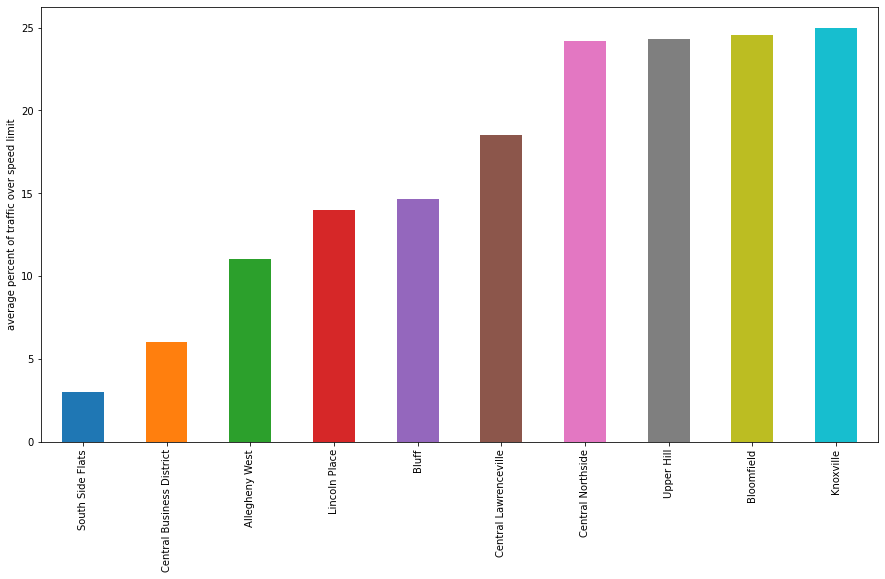

In [23]:
#graph top ten neighborhood for speed limit violations
top_ten_speeder = speeder_series.sort_values(ascending=True)[:10]
sgraph = top_ten_speeder.T.plot(kind='bar', label='index', color=['C0','C1','C2','C3','C4','C5','C6','C7','C8','C9','C10'],figsize=(15,top_ten_speeder.shape[0] * 0.8),legend=None)
sgraph.set_ylabel("average percent of traffic over speed limit")

South Side Flats wins again with the lowest percent of traffic over speed limit(3%), with a new runner up in second place Central Business District(6%).

# Highest Recorded Speed

In [7]:
turbo = pd.read_csv("City of Pittsburgh Traffic Count Data.csv")
#drop rows with na for fields of interest
turbo = turbo.dropna(subset=['max_speed'])
turbo = turbo.dropna(subset =['neighborhood'])
#reset index after dropping rows
turbo.reset_index(drop=True, inplace=True)
turbo.head(10)

,id,device_id,record_oid,count_start_date,count_end_date,average_daily_car_traffic,average_daily_bike_traffic,counter_number,counter_type,speed_limit,max_speed,median_speed,percent_over_limit,speed85_percent,speed95_percent,longitude,latitude,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone
0,1032382575,11,1.539893e+09,2018-08-28,2018-09-04,NaN,NaN,NaN,NaN,35.0,63.0,33.0,28.0,38.0,41.0,-80.076469,40.460717,Windgap,2.0,28.0,42003563000,5.0,28.0,6.0,1-16
1,103627606,9,7.341951e+08,2018-07-17,2018-08-01,2741.0,NaN,NaN,StatTrak,25.0,61.0,28.0,70.0,31.0,33.0,-79.914335,40.437379,Squirrel Hill South,5.0,14.0,42003140800,3.0,14.0,4.0,2-18
2,1102260248,8,1.088318e+09,2018-07-16,2018-08-01,5592.0,NaN,NaN,StatTrak,25.0,61.0,28.0,70.0,31.0,33.0,-79.911925,40.435620,Squirrel Hill South,5.0,14.0,42003140800,3.0,14.0,4.0,2-21
3,1158858353,36,1.131387e+09,2018-06-25,2018-07-12,7688.0,NaN,NaN,StatTrak,25.0,64.0,32.0,92.0,35.0,38.0,-79.923316,40.478161,Highland Park,7.0,11.0,42003110200,2.0,11.0,5.0,3-9
4,1345473232,26,1.550820e+09,2018-11-14,2018-11-20,9546.0,NaN,NaN,StatTrak,25.0,59.0,28.0,68.0,31.0,34.0,-79.927790,40.436881,Squirrel Hill South,5.0,14.0,42003141300,3.0,14.0,4.0,2-21
5,137432711,61,1.367249e+09,2019-03-07,2019-03-14,8512.0,NaN,1,StatTrak,25.0,30.0,26.0,52.0,31.0,35.0,-79.914397,40.460623,Larimer,9.0,12.0,42003120800,2.0,12.0,5.0,3-10
6,1466903750,3,2.009670e+09,2018-09-13,2018-09-20,8407.0,NaN,NaN,StatTrak,25.0,77.0,32.0,97.0,36.0,39.0,-79.928992,40.469320,East Liberty,9.0,11.0,42003111300,2.0,11.0,5.0,3-4
7,1669534769,10,1.211728e+09,2018-08-20,2018-09-04,2931.0,NaN,NaN,StatTrak,25.0,73.0,32.0,44.0,36.0,40.0,-80.073396,40.457660,Windgap,2.0,28.0,42003563000,5.0,28.0,6.0,1-16
8,1670424503,45,2.562964e+08,2018-12-11,2018-12-20,2046.0,NaN,2,StatTrak,25.0,56.0,30.0,85.0,35.0,38.0,-80.025537,40.404949,Beechview,4.0,19.0,42003192000,5.0,19.0,6.0,4-28
9,1858604360,43,1.603853e+09,2018-12-04,2018-12-08,768.0,NaN,2,StatTrak,25.0,20.0,19.3,0.0,19.5,19.8,-79.961140,40.458735,Polish Hill,7.0,6.0,42003060500,6.0,6.0,2.0,2-6


In [8]:
turbo_dict = dict()
turbo_count = dict()
# iterate through the dataframe
for i in range(len(turbo)):
    #get the neighborhood name and max recorded speed
    item = turbo.loc[i, 'neighborhood']
    item2 = turbo.loc[i, 'max_speed']
    if item in turbo_dict: # if it's in the dict
        turbo_dict[item] = (turbo_dict[item] + item2)
        turbo_count[item] = (turbo_count[item] + 1)
    else:
        turbo_dict[item] = item2 # otherwise, set it to the quantity
        turbo_count[item] = 1
        
for item in turbo_dict:
    turbo_dict[item] = turbo_dict[item] / turbo_count[item]

In [9]:
#convert dictionary back to series
turbo_series = pd.Series(turbo_dict, name = "Maximum speed observed")
turbo_series.sort_values()[:]

Spring Hill-City View       25.000000
Polish Hill                 43.000000
Central Oakland             43.000000
Perry South                 43.500000
Bloomfield                  44.000000
New Homestead               44.000000
Central Northside           44.500000
Elliott                     45.000000
Lincoln Place               46.000000
Perry North                 47.000000
Sheraden                    48.000000
Hazelwood                   48.000000
Central Lawrenceville       50.000000
Chartiers City              51.000000
Upper Hill                  53.000000
East Hills                  53.500000
Lincoln-Lemington-Belmar    53.500000
Larimer                     55.750000
Beechview                   56.000000
Marshall-Shadeland          57.000000
West Oakland                57.000000
Summer Hill                 57.000000
Homewood North              57.000000
Morningside                 58.000000
Manchester                  58.333333
Squirrel Hill South         59.700000
East Liberty

Text(0, 0.5, 'Maximum speed observed')

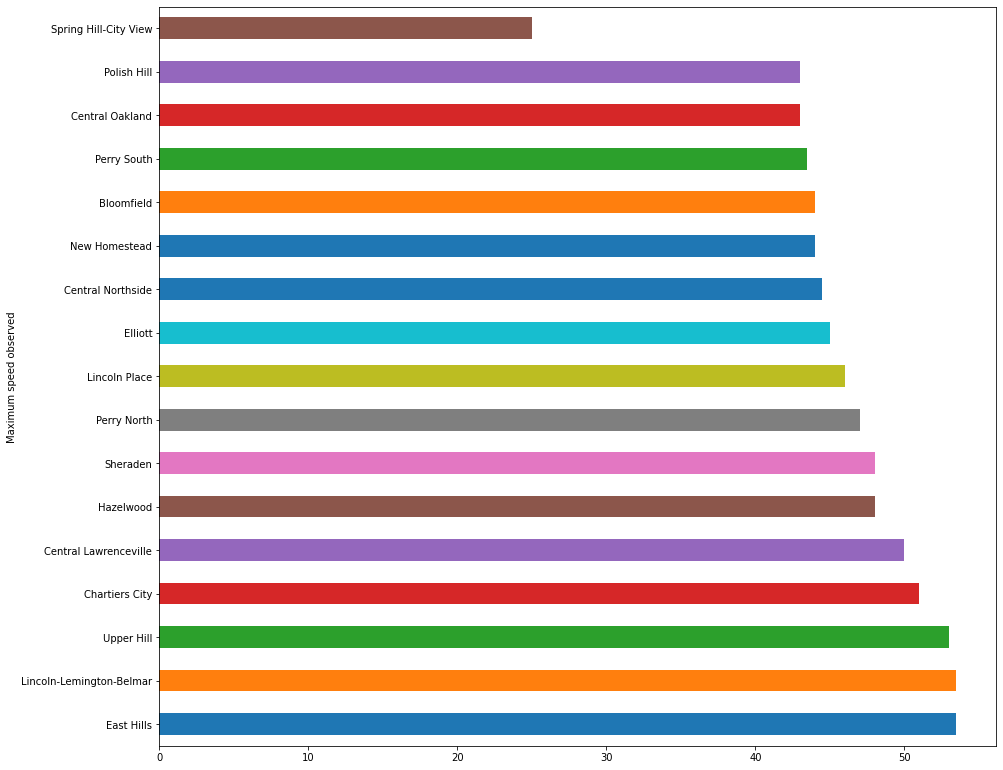

In [18]:
#graph top twenty neighborhoods by lowest maximum speed observed
top_ten_turbo = turbo_series.sort_values(ascending=False)[20:]
tbgraph = top_ten_turbo.plot.barh(label='index', color=['C0','C1','C2','C3','C4','C5','C6','C7','C8','C9','C10'],figsize=(15,top_ten_turbo.shape[0] * 0.8),legend=None)
tbgraph.set_ylabel("Maximum speed observed")

The graph has a new winner Spring Hill-City View for lowest maximum speed observed(25 mph).

# Conclusion from analyzing traffic metric

After analyzing the traffic data for average daily traffic, percent of speeders, and highest recorded speed, the most traversable neighborhood is South Side Flats with 1st place in two tests. Our runner up is Lincoln Place with one 2nd place and one 4th place finish.

<h1> City of Pittsburgh Commute and Road Data </h1>
</br>

<p1> To answer our question of finding the most traversable neighborhood in Pittsburgh, I have chosen to analyze the percentage of different types of commuting from each neighborhood. This data combined with data on the Street density per neighborhood, I hope to find the best neighborhood from traversing. I will use this data to find which neighborhood has the least amount of people commuting to work by cars, which would mean less traffic, then by looking at the remaining data and finding which neighborhood has the most diversity in means of commuting. Then combine the Street density, which would show the availability of roads for transport in each neighborhood. </p1>
</br>
__________________________________________________________________________________________________________________________________

In [7]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

First we have our imports, Pandas, Numpy and Matplotlib.

Then we read in the data from transportation.csv, and drop the rows that are missing a value to help keep our data accurate.
The data came in alphabetical order based on Neighborhoods, so there was no need to reorder the original data. 

In [8]:

transport_2010 = pd.read_csv("transportation.csv") 
#Reading in our csv data
transport_2010 = transport_2010.dropna()
#Dropping out any data that is N/A, to keep our data accurate.
transport_2010.head(10)
#no need to sort the data, because it is already sorted in order of Neighborhoods

,Neighborhood,Sector #,Population (2010),Miles of Major Roads,Total Street Miles,Street Density (st. mi/area sq. mi),# Sets of Steps,# Step Treads,Res. Permit Parking Area(s),Total Working Pop. (Age 16+) (2010),Commute to Work: Drive Alone (2010),Commute to Work: Carpool/Vanpool (2010),Commute to Work: Public Transportation (2010),Commute to Work: Taxi (2010),Commute to Work: Motorcycle (2010),Commute to Work: Bicycle (2010),Commute to Work: Walk (2010),Commute to Work: Other (2010),Work at Home (2010)
0,Allegheny Center,3,933,2.23,4.14,19.7,0,0,None,386,27.7%,9.8%,16.8%,0.0%,0.0%,0.0%,43.8%,0.0%,1.8%
1,Allegheny West,3,462,1.47,4.87,34.5,0,0,G,151,23.2%,20.5%,15.9%,14.6%,0.0%,0.0%,25.8%,0.0%,0.0%
2,Allentown,6,"2,500",1.65,12.33,41.8,12,474,None,824,47.0%,10.9%,38.0%,0.0%,0.8%,0.0%,0.0%,1.5%,1.8%
3,Arlington,7,"1,869",0.86,10.73,22.8,13,428,None,673,74.0%,7.3%,13.5%,0.0%,0.0%,0.0%,1.9%,0.9%,2.4%
4,Arlington Heights,7,244,0.00,1.09,8.2,0,0,None,72,11.1%,0.0%,88.9%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%
5,Banksville,5,"4,144",5.99,18.33,18.9,4,322,None,"2,506",81.5%,5.9%,11.7%,0.0%,0.0%,0.0%,0.7%,0.2%,0.0%
6,Bedford Dwellings,15,"1,202",0.97,4.48,25.1,3,234,None,305,36.7%,16.7%,33.8%,0.0%,0.0%,0.0%,12.8%,0.0%,0.0%
7,Beechview,5,"7,974",6.42,30.75,21.1,39,"2,494","BB, T","3,909",55.1%,15.3%,21.2%,0.0%,0.0%,0.6%,5.3%,0.0%,2.6%
8,Beltzhoover,6,"1,925",3.32,17.26,41.0,16,595,None,706,45.8%,8.1%,43.1%,0.0%,0.0%,0.0%,0.0%,0.0%,3.1%
9,Bloomfield,12,"8,442",3.80,31.74,45.2,3,131,"H, R","5,117",42.0%,9.3%,20.0%,0.0%,0.8%,6.4%,18.8%,0.0%,2.6%


In [9]:

Commute = pd.read_csv("transportation.csv",usecols=['Neighborhood','Commute to Work: Drive Alone (2010)','Commute to Work: Carpool/Vanpool (2010)','Commute to Work: Public Transportation (2010)',
                                                   'Commute to Work: Taxi (2010)','Commute to Work: Motorcycle (2010)','Commute to Work: Bicycle (2010)','Commute to Work: Walk (2010)','Commute to Work: Other (2010)'])
#Commute is reading data from transportation.csv, but only using Columns relevant to the first data analysis, which is based on the Commutes to work.

Commute['Commute to Work: Drive Alone (2010)'] = Commute['Commute to Work: Drive Alone (2010)'].str.rstrip('%').astype('float')
Commute['Commute to Work: Carpool/Vanpool (2010)'] = Commute['Commute to Work: Carpool/Vanpool (2010)'].str.rstrip('%').astype('float')
Commute['Commute to Work: Public Transportation (2010)'] = Commute['Commute to Work: Public Transportation (2010)'].str.rstrip('%').astype('float')
Commute['Commute to Work: Taxi (2010)'] = Commute['Commute to Work: Taxi (2010)'].str.rstrip('%').astype('float')
Commute['Commute to Work: Motorcycle (2010)'] = Commute['Commute to Work: Motorcycle (2010)'].str.rstrip('%').astype('float')
Commute['Commute to Work: Bicycle (2010)'] = Commute['Commute to Work: Bicycle (2010)'].str.rstrip('%').astype('float')
Commute['Commute to Work: Walk (2010)'] = Commute['Commute to Work: Walk (2010)'].str.rstrip('%').astype('float')
Commute['Commute to Work: Other (2010)'] = Commute['Commute to Work: Other (2010)'].str.rstrip('%').astype('float')
#Above is changing the percentages, by removing them and changing them to float values instead so it can be easily represented in a plot.

Commute = Commute.dropna()
Commute.head(10)

,Neighborhood,Commute to Work: Drive Alone (2010),Commute to Work: Carpool/Vanpool (2010),Commute to Work: Public Transportation (2010),Commute to Work: Taxi (2010),Commute to Work: Motorcycle (2010),Commute to Work: Bicycle (2010),Commute to Work: Walk (2010),Commute to Work: Other (2010)
0,Allegheny Center,27.7,9.8,16.8,0.0,0.0,0.0,43.8,0.0
1,Allegheny West,23.2,20.5,15.9,14.6,0.0,0.0,25.8,0.0
2,Allentown,47.0,10.9,38.0,0.0,0.8,0.0,0.0,1.5
3,Arlington,74.0,7.3,13.5,0.0,0.0,0.0,1.9,0.9
4,Arlington Heights,11.1,0.0,88.9,0.0,0.0,0.0,0.0,0.0
5,Banksville,81.5,5.9,11.7,0.0,0.0,0.0,0.7,0.2
6,Bedford Dwellings,36.7,16.7,33.8,0.0,0.0,0.0,12.8,0.0
7,Beechview,55.1,15.3,21.2,0.0,0.0,0.6,5.3,0.0
8,Beltzhoover,45.8,8.1,43.1,0.0,0.0,0.0,0.0,0.0
9,Bloomfield,42.0,9.3,20.0,0.0,0.8,6.4,18.8,0.0


<h1> Combining Data </h1>

In [10]:
Commute['Commute to Work: Drive Alone (2010)'] = Commute['Commute to Work: Drive Alone (2010)'] + Commute['Commute to Work: Carpool/Vanpool (2010)']
# I combine the Commute to work with Commuting by Carpooling/Vanpooling. This is because they both involving commuting with cars, which creates traffic
Commute.rename({'Commute to Work: Drive Alone (2010)':'Commute to Work: By Car (2010)'},inplace=True, axis=1)
#After combining the data, I rename the data so that its understood that the data is combined.
Commute.drop('Commute to Work: Carpool/Vanpool (2010)', axis=1,inplace=True)
#After combining the data, I remove the Carpool/Vanpool so there's no repeat data.
Commute.head(10)

,Neighborhood,Commute to Work: By Car (2010),Commute to Work: Public Transportation (2010),Commute to Work: Taxi (2010),Commute to Work: Motorcycle (2010),Commute to Work: Bicycle (2010),Commute to Work: Walk (2010),Commute to Work: Other (2010)
0,Allegheny Center,37.5,16.8,0.0,0.0,0.0,43.8,0.0
1,Allegheny West,43.7,15.9,14.6,0.0,0.0,25.8,0.0
2,Allentown,57.9,38.0,0.0,0.8,0.0,0.0,1.5
3,Arlington,81.3,13.5,0.0,0.0,0.0,1.9,0.9
4,Arlington Heights,11.1,88.9,0.0,0.0,0.0,0.0,0.0
5,Banksville,87.4,11.7,0.0,0.0,0.0,0.7,0.2
6,Bedford Dwellings,53.4,33.8,0.0,0.0,0.0,12.8,0.0
7,Beechview,70.4,21.2,0.0,0.0,0.6,5.3,0.0
8,Beltzhoover,53.9,43.1,0.0,0.0,0.0,0.0,0.0
9,Bloomfield,51.3,20.0,0.0,0.8,6.4,18.8,0.0


Text(0, 0.5, 'Neighborhoods')

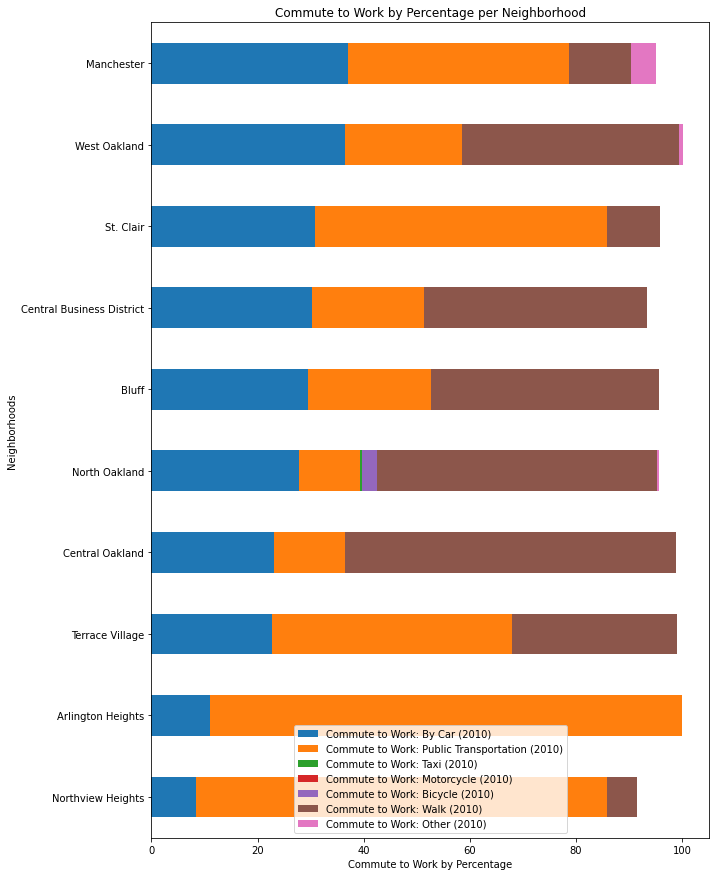

In [11]:

SortCommute = Commute.sort_values(by=["Commute to Work: By Car (2010)"]).head(10)
#I Sort the data by the Commute to work by car, then take the top 10, which gives the top 10 with the least car travel.
SortCommute.plot.barh(x='Neighborhood', figsize=(10,15), stacked=True)
#creating the barh plot.
plt.title("Commute to Work by Percentage per Neighborhood")
plt.xlabel("Commute to Work by Percentage")
plt.ylabel("Neighborhoods")
#Labeling the Barh Plot.

From the Barh graph, we are able to see the top 10 neighborhoods that have the least percentage of people commuting to work by cars. From this data we can see which neighborhoods are most likely to have the least amount of traffic. We can also find which of these has the most diverse range of means of transport. The one that has the most forms of transport, means that it is able to be traversed by multiple means of transport, and with a much lower level of traffic than the neighborhoods not in the top 10. From this graph, we can conclude that the best neighborhood is North Oakland, because of its low amount of car travel, and diversity in its means of transport.


In [12]:
Roads_2010 = pd.read_csv("transportation.csv",usecols=['Neighborhood','Street Density (st. mi/area sq. mi)'])
#We create the Roads data, which is using the street density from the transprotation.csv. We also take in the Neighborhoods.
Roads_2010.head(10)

,Neighborhood,Street Density (st. mi/area sq. mi)
0,Allegheny Center,19.7
1,Allegheny West,34.5
2,Allentown,41.8
3,Arlington,22.8
4,Arlington Heights,8.2
5,Banksville,18.9
6,Bedford Dwellings,25.1
7,Beechview,21.1
8,Beltzhoover,41.0
9,Bloomfield,45.2


In [13]:

RoadData = Roads_2010.sort_values(by=["Street Density (st. mi/area sq. mi)"],ascending=False).head(10)
#I Sort the values in Roads_2010 based on which neighborhood has the largest Street Density
RoadData

,Neighborhood,Street Density (st. mi/area sq. mi)
25,East Allegheny,71.8
10,Bluff,50.4
16,Central Business District,48.2
43,Knoxville,47.7
18,Central Northside,47.0
9,Bloomfield,45.2
56,North Shore,44.9
50,Middle Hill,43.5
23,Crawford-Roberts,43.0
41,Homewood South,41.9


Text(0, 0.5, 'Street Density (st.mi/area sq.mi)')

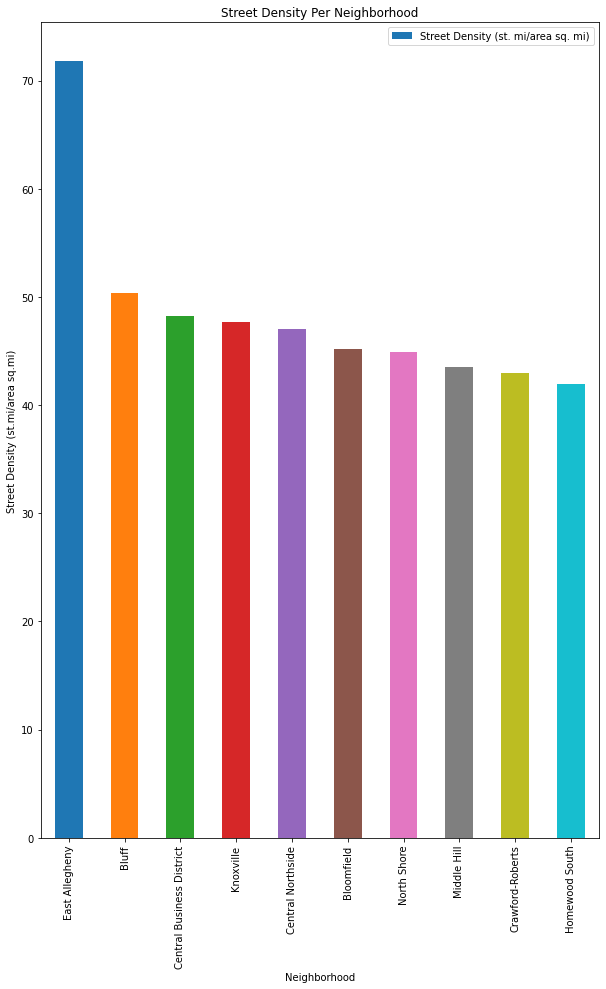

In [14]:

RoadData.plot.bar(x='Neighborhood',y='Street Density (st. mi/area sq. mi)',color=['C0','C1','C2','C3','C4','C5','C6','C7','C8','C9','C10'],figsize = (10,15))
#This is creating the bar graph of the Neighborhood with the most Street Density, and Colors them differently.
plt.title("Street Density Per Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Street Density (st.mi/area sq.mi)")
#Setting the labels on the bar graph.

The above graph is representing the top 10 neighborhoods based on which has the most Street Density (st.mi/area sq.mi). Just from looking at this data, East Allegheny is the clear winner of this represented data. However, comparing this top 10 data with the data represented in the graph of least amount of commuting to work by cars graph, there's two that are on both: Central Business District, and Bluff.

<h1> Conclusion of analyzed data from Street Density, and Commuting </h1> 

From analyzing the Street density to find the neighborhood with the most street available and Commuting data to see which neighborhood had the most available options of travel, the most traversable neighborhood is Bluff, but ever so slightly. Central Business District was a very close second, however Bluff beat it by being 3 higher in st.mi/area sq.mi for Street Density, and by having slightly less people commuting to work by car.

# Most Traversable Neighborhood in Pittsburgh: Bluff and Central Business District

**Chris' Reflection -** While my data did not display our end result, I agree with it. I agree with the second two metrics being weighted heavier than the crash data. From my experience using Port Authority, some of these areas are designed for people to move around the city efficiently. Far less people have cars in these areas so traversability is far more important than in areas further from the city. While safety is an important factor in traversability, it does not reflect the demand for more traversability in varying areas. The lack of parking seems to have a much greater impact.

**Logan's Reflection -** I haven't lived in Pittsburgh for very long and didn't know any of the neighborhoods, or where they were located uptill this project. So my conclusion is based primarily off of the data, in that the best neighborhoods is a tie between Bluff and Central Business District. This is because they had the lowest amount of car travel allowing for less traffic, and some of the greatest Street density, making these two very traversable. So far from personal experience, I have found for there to be lots of construction throughout Pittsburgh, and so I think one of these two with the amount of road they provide, would most likely be my favorite because they would have plenty of alternate routes.

**Alex's Reflection -** I have lived in Pittsburgh my whole life and have visited both of these places. I would have to agree with the analysis that these neighborhoods are some of the better ones in the area. The Central Business District is a safe place to walk around considering I have yet to be hit by a car. Bluff is also a nice area with a good hospital there and a good college campus right next to it(Duquesne University).